In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../data/external/Shakespeare_data.csv')

In [2]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [4]:
df['Player'].replace(np.nan, 'Other',inplace = True)
df.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [5]:
print("Number of plays are: " + str(df['Play'].nunique()))

Number of plays are: 36


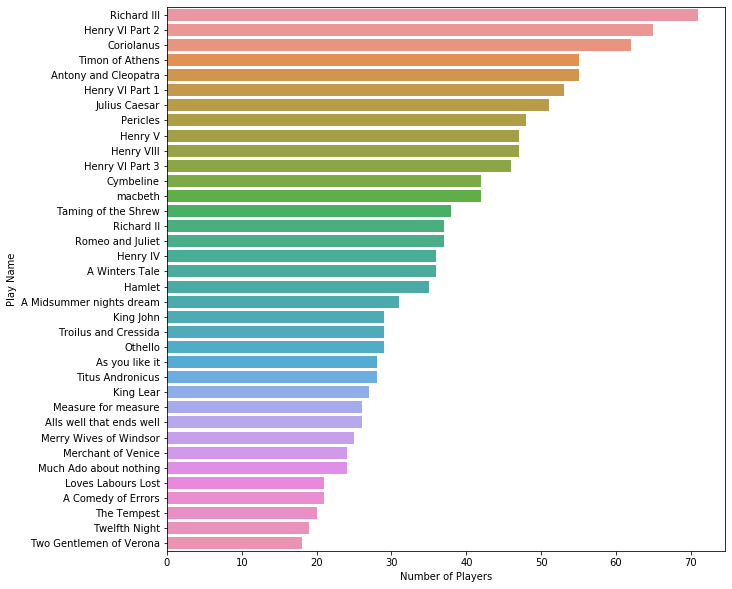

In [6]:
#Finding and plotting number of players per play
pd.DataFrame(df['Play'].unique().tolist(), columns=['Play Name'])
Playersperplay = df.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
Playersperplay['Play'] = Playersperplay.index.tolist()
Playersperplay.columns = ['Num Players','Play']
Playersperplay.index= np.arange(0,len(Playersperplay))
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=Playersperplay)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

In [7]:
#Finding and plotting number of lines in each play
play_data = df.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
play_data

,Lines,Play
0,4244,Hamlet
1,3992,Coriolanus
2,3958,Cymbeline
3,3941,Richard III
4,3862,Antony and Cleopatra
5,3766,King Lear
6,3762,Othello
7,3711,Troilus and Cressida
8,3489,A Winters Tale
9,3419,Henry VIII


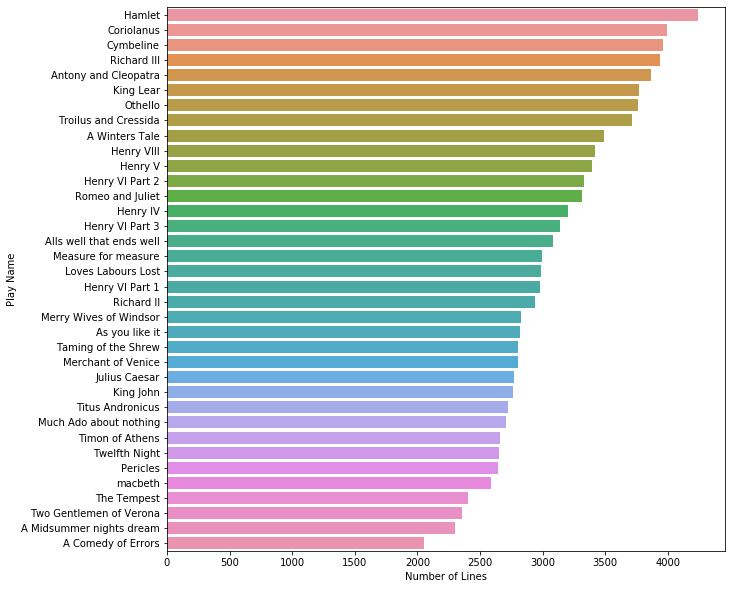

In [8]:
plt.figure(figsize=(10,10))
ax= sns.barplot(x='Lines',y='Play',data=play_data, order = play_data['Play'])
ax.set(xlabel='Number of Lines', ylabel='Play Name')
plt.show()

In [9]:
#Number of lines spoken per player in each play
lines_per_player= df.groupby(['Play','Player']).count()['PlayerLine']
lines_per_player= lines_per_player.to_frame()
lines_per_player

PlayerLine
Play               Player                      
A Comedy of Errors ADRIANA                  284
                   AEGEON                   150
                   AEMELIA                   75
                   ANGELO                    99
                   ANTIPHOLUS                 6
...                                         ...
macbeth            Son                       24
                   Third Apparition           6
                   Third Murderer             8
                   Third Witch               27
                   YOUNG SIWARD               8

[1328 rows x 1 columns]

In [10]:
#Feature Engineering
df.loc[1]['PlayerLine']

'SCENE I. London. The palace.'

In [11]:
#Lower casing the text
df['PlayerLine_parsed'] = df['PlayerLine'].str.lower()

In [12]:
#getting rid of punctuations
punctuation_signs = list("?:!.,;")
df['PlayerLine_parsed_2'] = df['PlayerLine_parsed']

for punct_sign in punctuation_signs:
    df['PlayerLine_parsed_2'] = df['PlayerLine_parsed_2'].str.replace(punct_sign, '')

In [13]:
#remove possessive pronoun terminations
df['PlayerLine_parsed_3'] = df['PlayerLine_parsed_2'].str.replace("'s", "")

In [14]:
#Lemmitization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mugdhabajjuri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mugdhabajjuri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [16]:
#In order to lemmatize, we have to iterate through every word:

nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['PlayerLine_parsed_3']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [17]:
df['PlayerLine_parsed_4'] = lemmatized_text_list

In [18]:
#stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mugdhabajjuri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [20]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
df['PlayerLine_parsed_5'] = df['PlayerLine_parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['PlayerLine_parsed_5'] = df['PlayerLine_parsed_5'].str.replace(regex_stopword, '')



In [22]:
df.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,PlayerLine_parsed,PlayerLine_parsed_2,PlayerLine_parsed_3,PlayerLine_parsed_4,PlayerLine_parsed_5
0,1,Henry IV,NaN,NaN,Other,ACT I,act i,act i,act i,act i,act
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.,scene i. london. the palace.,scene i london the palace,scene i london the palace,scene i london the palace,scene london palace
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ...","enter king henry, lord john of lancaster, the ...",enter king henry lord john of lancaster the ea...,enter king henry lord john of lancaster the ea...,enter king henry lord john of lancaster the ea...,enter king henry lord john lancaster earl w...
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,","so shaken as we are, so wan with care,",so shaken as we are so wan with care,so shaken as we are so wan with care,so shake as we be so wan with care,shake wan care
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,","find we a time for frighted peace to pant,",find we a time for frighted peace to pant,find we a time for frighted peace to pant,find we a time for fright peace to pant,find time fright peace pant


In [23]:
to_drop = ['PlayerLine_parsed','PlayerLine_parsed_2', 'PlayerLine_parsed_3','PlayerLine_parsed_4']
df.drop(to_drop, inplace=True, axis=1)

In [24]:
df = df.rename(columns={'PlayerLine_parsed_5': 'PlayerLine_parsed'})

In [25]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,PlayerLine_parsed
0,1,Henry IV,NaN,NaN,Other,ACT I,act
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.,scene london palace
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ...",enter king henry lord john lancaster earl w...
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",shake wan care
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",find time fright peace pant


In [26]:
#Machine learning models require numeric features and labels to provide a prediction. For this reason we must create a dictionary to map each label to a numerical ID. 
#Here labels are Players

players = df.Player.unique()
i=0
Player_codes = dict()
for player in players:
    Player_codes[player]=i
    i=i+1

In [27]:
plays = df.Play.unique()
j=0
Play_codes = dict()
for play in plays:
    Play_codes[play]=j
    j=j+1

In [28]:
PlayerLinenumbers = df.PlayerLinenumber.unique()
k=0.01
PlayerLinenumber_codes = dict()
for PlayerLinenumber in PlayerLinenumbers:
    PlayerLinenumber_codes[PlayerLinenumber]=k
    k=k+1

In [29]:
ActSceneLines = df.ActSceneLine.unique()
j=0
ActSceneLine_codes = dict()
for ActSceneLine in ActSceneLines:
    ActSceneLine_codes[ActSceneLine]=j
    j=j+1

In [30]:
df['Player_code'] = df['Player']
df = df.replace({'Player_code':Player_codes})

In [31]:
df['Play_code'] = df['Play']
df = df.replace({'Play_code':Play_codes})

In [32]:
df['PlayerLinenumber_code'] = df['PlayerLinenumber']
df = df.replace({'PlayerLinenumber_code':PlayerLinenumber_codes})

In [33]:
df['ActSceneLine_code'] = df['ActSceneLine']
df = df.replace({'ActSceneLine_code':ActSceneLine_codes})

In [34]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,PlayerLine_parsed,Player_code,Play_code,PlayerLinenumber_code,ActSceneLine_code
0,1,Henry IV,NaN,NaN,Other,ACT I,act,0,0,0.01,0
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.,scene london palace,0,0,0.01,0
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ...",enter king henry lord john lancaster earl w...,0,0,0.01,0
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",shake wan care,1,0,1.01,1
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",find time fright peace pant,1,0,1.01,2


In [35]:
#Vectorizing Player line using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2)
#ignoring terms that appear in less than 5 docs
min_df = 5
#ignoring terms that appear in more than 50% of docs
max_df = 0.50
max_features = 100
tfidf = TfidfVectorizer(encoding='utf-8', ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True )
                        
features_train = tfidf.fit_transform(df.PlayerLine_parsed).toarray()
print(features_train.shape)

(111396, 100)


In [36]:
#Spliting the dataset to form train and test sets
vecdf = pd.DataFrame(features_train) 
vecdf['Playcode'] = df['Play_code']
vecdf['ActSceneLine_code'] = df['ActSceneLine_code']
vecdf['PlayerLinenumber_code'] = df['PlayerLinenumber_code']
X = np.asarray(vecdf)
y = np.asarray(df['Player_code'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(89116, 103) (89116,)
(22280, 103) (22280,)


In [37]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for dataset
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.72


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.61


In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print('Accuracy of Naive bayes classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of Naive bayes classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of Naive bayes classifier on training set: 0.78
Accuracy of Naive bayes classifier on test set: 0.61


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(input='content', encoding='utf-8', 
                       decode_error='strict',
                       analyzer='word', max_df= max_df, min_df= min_df
                        )
features_train1 = cvec.fit_transform(df.PlayerLine_parsed).toarray()
print(features_train1.shape)

(111396, 6614)


In [41]:
#Spliting the dataset to form train and test sets
vecdf = pd.DataFrame(features_train1) 
vecdf['Playcode'] = df['Play_code']
vecdf['ActSceneLine_code'] = df['ActSceneLine_code']
vecdf['PlayerLinenumber_code'] = df['PlayerLinenumber_code']
X = np.asarray(vecdf)
y = np.asarray(df['Player_code'])
from sklearn.model_selection import train_test_split
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(X, y, test_size=0.2)
print (xTrain1.shape, yTrain1.shape)
print (xTest1.shape, yTest1.shape)

(89116, 6617) (89116,)
(22280, 6617) (22280,)


In [42]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(xTrain1, yTrain1)
#Predict the response for dataset
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(xTrain1, yTrain1)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(xTest1, yTest1)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.70
